In [1545]:
import pandas as pd 

import numpy as np 

import sklearn 

pd.options.display.float_format = "{:.5f}".format

pd.set_option('display.max_columns', 500)




In [1546]:
from  sklearn.model_selection  import train_test_split

In [1547]:
from sklearn.feature_selection import RFE , SelectKBest 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import f_regression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV

from   sklearn import  metrics 

In [1548]:
## Data importing 


demo = pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx")
behaviour = pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx")
credit_consuption = pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx")    

## Basic Data check 

In [1549]:
demo.info()

## some missing are there 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [1550]:
behaviour.info()        ## some missing are there 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [1551]:
credit_consuption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [1552]:
credit_consuption

,ID,cc_cons
0,12554,20014.00000
1,17645,10173.00000
2,7604,16095.00000
3,1590,7707.00000
4,16556,96408.00000
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [1553]:
## Changing the names of veriable to lower-case :
demo.rename({"Income":"income", "ID":"id","Emp_Tenure_Years":"emp_tenure_years", "Tenure_with_Bank":"tenure_with_bank", "NetBanking_Flag":"netbanking_flag","Avg_days_between_transaction":"avg_days_between_transaction" }, axis=1, inplace=True)

behaviour.rename({"ID":"id"} ,axis=1, inplace= True)

In [1554]:
## Check the data type of variables 

In [1555]:
demo.dtypes

id                                int64
account_type                     object
gender                           object
age                               int64
income                           object
emp_tenure_years                float64
tenure_with_bank                  int64
region_code                     float64
netbanking_flag                   int64
avg_days_between_transaction    float64
dtype: object

In [1556]:
## makeing categorical/objective variable as numerical to use in model building : 

demo["saving"]= pd.get_dummies(demo.account_type ,drop_first= True)  ## droping first variable for removing multicollinearity

demo["male"]= pd.get_dummies(demo.gender ,drop_first= True)

demo["income_num"] = np.where(demo.income == "Low", 0 , np.where(demo.income == "MEDIUM", 1 , 2)) ## Makeing categorical variable to 
## numeical , to use for model building 

In [1557]:
## Checking for any patten in age variable to make it odinal categorical variable 

age = pd.DataFrame(demo.age.value_counts())

age.rename({"age":"no_of_customer"}, axis=1, inplace=True)

age.reset_index(inplace=True)

age.rename({"index":"age"}, axis=1, inplace=True)

age.sort_values(by='age')

,age,no_of_customer
32,25,134
11,27,705
10,28,710
15,29,601
5,30,986
21,31,292
2,32,1075
0,33,1711
9,34,778
4,35,1020


In [1558]:
pd.qcut(demo.age, q=4 )

0         (53.0, 223.0]
1          (33.0, 40.0]
2        (24.999, 33.0]
3        (24.999, 33.0]
4        (24.999, 33.0]
              ...      
19995     (53.0, 223.0]
19996      (40.0, 53.0]
19997     (53.0, 223.0]
19998    (24.999, 33.0]
19999     (53.0, 223.0]
Name: age, Length: 20000, dtype: category
Categories (4, interval[float64]): [(24.999, 33.0] < (33.0, 40.0] < (40.0, 53.0] < (53.0, 223.0]]

In [1559]:
demo["age_ordinal"] = np.where(demo.age <=33,1,np.where(demo.age <=40, 2 , np.where(demo.age <=53 , 3 , 4 )))

In [1560]:
## Doing feature reduction by removing ordiginal variables as we now have derived variables of that variable : 
demo.drop({"account_type","gender","age", "income"} ,axis=1, inplace=True)

In [1561]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20000 non-null  int64  
 1   emp_tenure_years              20000 non-null  float64
 2   tenure_with_bank              20000 non-null  int64  
 3   region_code                   19999 non-null  float64
 4   netbanking_flag               20000 non-null  int64  
 5   avg_days_between_transaction  19997 non-null  float64
 6   saving                        20000 non-null  uint8  
 7   male                          20000 non-null  uint8  
 8   income_num                    20000 non-null  int32  
 9   age_ordinal                   20000 non-null  int32  
dtypes: float64(3), int32(2), int64(3), uint8(2)
memory usage: 1.1 MB


In [1562]:
## Missing treatment 

demo.isna().sum()

## Missing in region_code and avg_days_between_transaction 

id                              0
emp_tenure_years                0
tenure_with_bank                0
region_code                     1
netbanking_flag                 0
avg_days_between_transaction    3
saving                          0
male                            0
income_num                      0
age_ordinal                     0
dtype: int64

In [1563]:
demo[demo.avg_days_between_transaction.isna() == True]

,id,emp_tenure_years,tenure_with_bank,region_code,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal
87,3246,9.10000,10,958.00000,1,NaN,0,1,1,1
110,12413,3.50000,8,447.00000,1,NaN,0,1,2,1
126,6147,4.00000,3,385.00000,1,NaN,0,0,2,1


In [1564]:
demo[demo.region_code.isna() == True]

,id,emp_tenure_years,tenure_with_bank,region_code,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal
60,15029,26.10000,7,NaN,1,14.00000,0,1,2,3


In [1565]:
## Missing treatment by KNN 

from sklearn.impute import  KNNImputer

from sklearn.impute import  KNNImputer

missing_treatment = KNNImputer(n_neighbors= 5 , weights='distance')

missing_treatment  = missing_treatment.fit(demo)

demo = pd.DataFrame(missing_treatment.fit_transform(demo), columns=demo.columns)

In [1566]:
demo.isna().sum()

id                              0
emp_tenure_years                0
tenure_with_bank                0
region_code                     0
netbanking_flag                 0
avg_days_between_transaction    0
saving                          0
male                            0
income_num                      0
age_ordinal                     0
dtype: int64

In [1567]:
## Check for outliers

<AxesSubplot:>

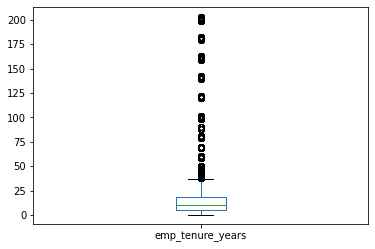

In [1568]:
demo.emp_tenure_years.plot.box()

In [1569]:
demo.describe(percentiles=[.01, .6,.7,.90])


,id,emp_tenure_years,tenure_with_bank,region_code,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal
count,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000
mean,9999.50000,15.21725,5.49605,598.95257,0.71800,11.04502,0.15370,0.86435,1.36130,2.41370
std,5773.64703,20.48145,2.87045,220.10182,0.44998,5.48019,0.36067,0.34243,0.48039,1.16770
min,0.00000,0.50000,1.00000,123.00000,0.00000,2.00000,0.00000,0.00000,1.00000,1.00000
1%,199.99000,0.90000,1.00000,233.00000,0.00000,2.00000,0.00000,0.00000,1.00000,1.00000
50%,9999.50000,9.90000,6.00000,623.00000,1.00000,11.00000,0.00000,1.00000,1.00000,2.00000
60%,11999.40000,12.40000,7.00000,684.00000,1.00000,13.00000,0.00000,1.00000,1.00000,3.00000
70%,13999.30000,15.60000,7.00000,746.00000,1.00000,15.00000,0.00000,1.00000,2.00000,3.00000
90%,17999.10000,31.50000,10.00000,883.00000,1.00000,19.00000,1.00000,1.00000,2.00000,4.00000
max,19999.00000,203.00000,10.00000,974.00000,1.00000,20.00000,1.00000,1.00000,2.00000,4.00000


In [1570]:
demo.emp_tenure_years[demo.emp_tenure_years>=31.50] = 31.50

In [1571]:
demo.tenure_with_bank[demo.tenure_with_bank]

10.00000    2.00000
10.00000    2.00000
10.00000    2.00000
2.00000    10.00000
7.00000     1.00000
             ...   
6.00000     1.00000
5.00000     3.00000
1.00000    10.00000
8.00000     9.00000
7.00000     1.00000
Name: tenure_with_bank, Length: 20000, dtype: float64

<AxesSubplot:>

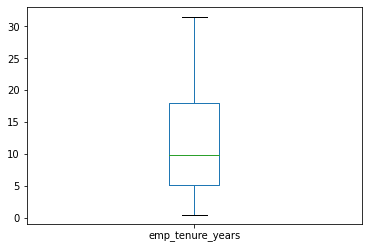

In [1572]:
demo.emp_tenure_years.plot.box()


In [1573]:
behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [1574]:
behaviour.rename({"cc_cons_apr": "cc_spend_apr", "dc_cons_apr":"dc_spend_apr", "cc_cons_may":"cc_spend_may", "dc_cons_may":"dc_spend_may" ,"cc_cons_jun":"cc_spend_jun" ,"dc_cons_jun":"dc_spend_jun", "investment_1":"investment_demat", "investment_2":"investment_fd", "investment_3":"investment_life" , "investment_4":"investment_genral", "debit_count_apr":"debit_amount_trans_count_apr", "credit_amount_apr":"credit_amount_trans_count_apr" , "debit_count_may":"debit_amount_trans_count_may" ,"credit_amount_may":"credit_amount_trans_count_may" ," credit_count_jun":" credit_amount_trans_count_jun" ,"debit_count_jun":"debit_amount_trans_count_jun" } ,axis=1, inplace=True)

In [1575]:
## Unique veriable need to remove

behaviour.personal_loan_active.value_counts() 
behaviour.vehicle_loan_active.value_counts()
behaviour.personal_loan_closed.value_counts()
behaviour.vehicle_loan_closed.value_counts()
behaviour.loan_enq.value_counts()


Y    19998
Name: loan_enq, dtype: int64

In [1576]:
behaviour.drop(["personal_loan_active", "vehicle_loan_active", "personal_loan_closed", "vehicle_loan_closed", "loan_enq"],axis=1, inplace=True)

In [1577]:
## Check data types 
behaviour.dtypes

id                                 int64
cc_spend_apr                     float64
dc_spend_apr                     float64
cc_spend_may                     float64
dc_spend_may                     float64
cc_spend_jun                     float64
dc_spend_jun                     float64
cc_count_apr                     float64
cc_count_may                       int64
cc_count_jun                       int64
dc_count_apr                       int64
dc_count_may                       int64
dc_count_jun                       int64
card_lim                           int64
investment_demat                 float64
investment_fd                    float64
investment_life                  float64
investment_genral                float64
debit_amount_apr                 float64
credit_amount_trans_count_apr    float64
debit_amount_trans_count_apr     float64
credit_count_apr                   int64
max_credit_amount_apr            float64
debit_amount_may                 float64
credit_amount_tr

In [1578]:
## Check for missing 

behaviour.isna().sum()

id                               0
cc_spend_apr                     0
dc_spend_apr                     0
cc_spend_may                     1
dc_spend_may                     0
cc_spend_jun                     0
dc_spend_jun                     1
cc_count_apr                     1
cc_count_may                     0
cc_count_jun                     0
dc_count_apr                     0
dc_count_may                     0
dc_count_jun                     0
card_lim                         0
investment_demat                 0
investment_fd                    0
investment_life                  2
investment_genral                0
debit_amount_apr                 0
credit_amount_trans_count_apr    0
debit_amount_trans_count_apr     1
credit_count_apr                 0
max_credit_amount_apr            0
debit_amount_may                 0
credit_amount_trans_count_may    0
credit_count_may                 0
debit_amount_trans_count_may     0
max_credit_amount_may            0
debit_amount_jun    

In [1579]:
## Missing treatment by KNN 

missing_treatment_1 = KNNImputer(n_neighbors= 5 , weights='distance')

missing_treatment_1  = missing_treatment.fit(behaviour)

behaviour = pd.DataFrame(missing_treatment.fit_transform(behaviour), columns=behaviour.columns)

In [1580]:
behaviour.isna().any().sum()

0

In [1581]:
## Check for outliers  :


In [1582]:
behaviour.describe([.1,.25,.5,.6,.7,.8,.85, .88, .89, .9, ])

,id,cc_spend_apr,dc_spend_apr,cc_spend_may,dc_spend_may,cc_spend_jun,dc_spend_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_demat,investment_fd,investment_life,investment_genral,debit_amount_apr,credit_amount_trans_count_apr,debit_amount_trans_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_trans_count_may,credit_count_may,debit_amount_trans_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_amount_trans_count_jun,max_credit_amount_jun,emi_active
count,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000
mean,9999.50000,17856.99092,8130.45341,16188.85194,7702.42719,12135.80602,7109.53693,41.61104,33.56910,41.47020,17.07170,14.06775,30.48115,278346.39610,590898.10944,232952.03169,44603.63208,3495.43993,68644.99768,79686.84629,36.24076,11.25075,54418.93520,65306.35473,82937.06880,11.91900,40.97485,58207.98514,78122.79716,78816.92761,19.90545,44.52910,52849.84757,15398.36618
std,5773.64703,25158.87823,14572.18883,26510.10833,17892.73180,18790.98479,13313.62481,97.83306,50.31692,46.82566,19.28532,17.15780,29.33219,180758.30709,2937386.52798,407520.18142,88500.79964,7369.51139,113802.10645,183360.52123,30.57355,12.65654,196409.47018,101696.12284,171476.07586,16.85576,40.56120,208591.36270,244898.30873,156987.24176,27.05532,35.08045,134317.52511,120251.09023
min,0.00000,253.00000,19.35000,157.00000,22.00000,65.00000,62.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.30000,3.00000,462.00000,-12179.00000,4.01000,61.38000,0.00000,0.00000,1.00000,28.20000,10.61000,0.00000,0.00000,0.25000,5.23000,11.88000,1.00000,0.00000,0.06000,0.00000
10%,1999.90000,1908.00000,643.85000,1666.36400,731.00000,1367.52000,607.00000,2.00000,3.00000,4.00000,1.00000,1.00000,1.00000,47000.00000,690.00000,11772.76000,768.00000,-5942.00000,10396.20200,14104.30000,4.00000,1.00000,14234.80000,10742.48000,12581.33500,1.00000,6.00000,12003.00000,12573.95800,11509.04000,2.00000,7.00000,11200.00000,461.06000
25%,4999.75000,4377.00000,1624.65000,3635.91000,1634.26000,2999.07500,1361.10000,5.00000,8.00000,10.00000,2.00000,2.00000,4.00000,124000.00000,6030.65000,38928.00000,2214.00000,0.00000,23206.53000,26764.00000,11.00000,2.00000,20613.00000,20816.11000,25210.75000,2.00000,11.00000,20202.25000,25763.11000,24920.08000,4.00000,12.00000,18964.50000,1545.94000
50%,9999.50000,10214.64250,3964.75000,8638.87000,3791.72000,6656.80000,3326.00000,10.00000,23.00000,35.00000,7.00000,5.00000,17.00000,272000.00000,44331.81000,110135.86000,13873.00000,2351.00000,41681.14000,46998.00000,32.00000,4.00000,31908.00000,38116.00000,48137.18500,4.00000,23.00000,31496.50000,45725.05000,46183.00000,7.00000,37.00000,30250.00000,3934.85000
60%,11999.40000,13403.16800,5415.00000,11696.31000,5082.40000,8744.40000,4484.10000,17.00000,29.00000,48.00000,15.00000,9.00000,34.00000,329000.00000,68640.00000,157624.24000,24094.00000,4856.00000,51867.39000,58105.87000,42.00000,7.00000,37746.00000,48674.00000,61493.23000,6.00000,34.00000,38535.25000,56691.09000,58377.00000,11.00000,50.00000,36972.09800,5409.23800
70%,13999.30000,18152.00000,7684.30000,15817.00100,6865.00000,12026.70500,6234.80000,26.00000,36.00000,52.00000,24.00000,17.00000,47.00000,378000.00000,124929.75000,201000.00000,33774.00000,5773.00000,66374.36000,74547.00000,46.00000,14.00000,46472.05000,62597.00000,80131.00000,9.00000,59.00000,48701.40000,74094.41700,74358.00000,16.00000,63.00000,46343.00000,7801.21000
80%,15999.20000,25423.40000,11033.51000,22616.91200,10036.18000,16627.84500,9091.21600,52.00000,60.00000,67.00000,39.00000,25.00000,56.00000

In [1583]:
## treating outliers : 

behaviour.cc_spend_apr[behaviour.cc_spend_apr>=40640.9 ] = 40640.9
behaviour.dc_spend_apr[behaviour.dc_spend_apr>=18443.69] = 18443.69
behaviour.cc_spend_may[behaviour.cc_spend_may >=36139.22 ] = 36139.22
behaviour.dc_spend_may[behaviour.dc_spend_may >= 16144.76] = 16144.76
behaviour.cc_spend_jun[behaviour.cc_spend_jun >= 26791.17] = 26791.17
behaviour.dc_spend_jun[behaviour.dc_spend_jun >=15689.00] = 15689.00
behaviour.cc_count_apr[behaviour.cc_count_apr>= 80.000] = 80.00
behaviour.cc_count_may[behaviour.cc_count_may>= 83.00 ] = 83.00
behaviour.cc_count_jun[behaviour.cc_count_jun >= 84.00 ] = 84.00
behaviour.dc_count_apr[behaviour.dc_count_apr >= 50.00] = 50.00
behaviour.dc_count_may[behaviour.dc_count_may >= 44.00] = 44.00
behaviour.card_lim[behaviour.card_lim >=523000.00 ] = 523000.00
behaviour.investment_demat [behaviour.investment_demat >= 360978.37] = 360978.37
behaviour.investment_fd[behaviour.investment_fd>=482147.00] = 482147.00
behaviour.investment_life[behaviour.investment_life >=105000.00] =105000.00
behaviour.investment_genral[behaviour.investment_genral >=12415.00] =12415.00
behaviour.investment_genral[behaviour.investment_genral<=-5942.00] =  -5942.00
behaviour.debit_amount_apr[behaviour.debit_amount_apr >=139825.55] =139825.55
behaviour.credit_amount_trans_count_apr	[behaviour.credit_amount_trans_count_apr >=152525.00] =152525.00
behaviour.debit_amount_trans_count_apr[behaviour.debit_amount_trans_count_apr >=82.00] =82.00
behaviour.max_credit_amount_apr[behaviour.max_credit_amount_apr >=96111.00] =96111.00
behaviour.debit_amount_may[behaviour.debit_amount_may >=136226.17] =136226.17
behaviour.credit_amount_trans_count_may[behaviour.credit_amount_trans_count_may >=172374.90] =172374.90
behaviour.credit_count_may[behaviour.credit_count_may >=24] =24
behaviour.debit_amount_trans_count_may[behaviour.debit_amount_trans_count_may >=84.00 ] =84.00
behaviour.max_credit_amount_may[behaviour.max_credit_amount_may >=103500.00 ] =103500.00
behaviour.debit_amount_jun[behaviour.debit_amount_jun >=151821.74 ] =151821.74
behaviour.credit_amount_jun[behaviour.credit_amount_jun >=158148.58 ] =158148.58
behaviour.credit_count_jun[behaviour.credit_count_jun >=46 ] =46
behaviour.max_credit_amount_jun[behaviour.max_credit_amount_jun >=100183.00 ] = 100183.00
behaviour.emi_active[behaviour.emi_active >=19713.88 ] = 19713.88

<AxesSubplot:>

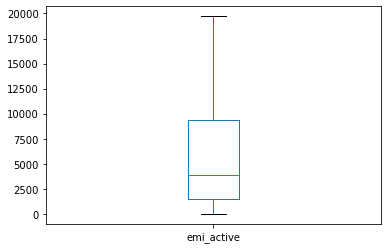

In [1584]:
behaviour.emi_active.plot.box()

In [1585]:
behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             20000 non-null  float64
 1   cc_spend_apr                   20000 non-null  float64
 2   dc_spend_apr                   20000 non-null  float64
 3   cc_spend_may                   20000 non-null  float64
 4   dc_spend_may                   20000 non-null  float64
 5   cc_spend_jun                   20000 non-null  float64
 6   dc_spend_jun                   20000 non-null  float64
 7   cc_count_apr                   20000 non-null  float64
 8   cc_count_may                   20000 non-null  float64
 9   cc_count_jun                   20000 non-null  float64
 10  dc_count_apr                   20000 non-null  float64
 11  dc_count_may                   20000 non-null  float64
 12  dc_count_jun                   20000 non-null 

In [1586]:
## Renaming variables name : 

credit_consuption.rename({'ID':'id', "cc_cons":"cc_spend_next_three_month_y"}, axis=1, inplace=True)

In [1587]:
a = pd.merge(left=demo , right=behaviour, how='inner', on='id')

In [1588]:
data = pd.merge(left=a, right=credit_consuption , how='inner', on='id')

In [1589]:
## Droping unique variables : 

data.drop(["id", "region_code"], axis=1, inplace=True)

In [1590]:
data

,emp_tenure_years,tenure_with_bank,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal,cc_spend_apr,dc_spend_apr,cc_spend_may,dc_spend_may,cc_spend_jun,dc_spend_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_demat,investment_fd,investment_life,investment_genral,debit_amount_apr,credit_amount_trans_count_apr,debit_amount_trans_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_trans_count_may,credit_count_may,debit_amount_trans_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_amount_trans_count_jun,max_credit_amount_jun,emi_active,cc_spend_next_three_month_y
0,30.10000,10.00000,1.00000,5.00000,0.00000,1.00000,1.00000,4.00000,7998.48000,2289.00000,9553.00000,2879.58000,6881.81000,3124.00000,8.00000,23.00000,13.00000,47.00000,3.00000,30.00000,519000.00000,13659.00000,14000.00000,80000.00000,6885.00000,79085.00000,44630.50000,63.00000,1.00000,48134.00000,107662.02000,61887.50000,5.00000,14.00000,20770.00000,44884.90000,158148.58000,40.00000,96.00000,46088.00000,2646.72000,NaN
1,14.40000,10.00000,0.00000,12.00000,0.00000,1.00000,1.00000,2.00000,16479.64000,415.00000,7386.49000,6763.00000,12032.60000,6738.00000,19.00000,32.00000,7.00000,1.00000,37.00000,16.00000,402000.00000,360978.37000,172131.00000,28912.00000,553.00000,85171.16000,152525.00000,10.00000,1.00000,31820.00000,34376.79000,36644.25000,4.00000,63.00000,78627.00000,91073.84000,158148.58000,7.00000,12.00000,17953.00000,5469.79000,NaN
2,4.80000,10.00000,1.00000,13.00000,0.00000,0.00000,1.00000,1.00000,29272.03000,18443.69000,4170.53000,16144.76000,531.43000,3778.00000,12.00000,30.00000,44.00000,22.00000,15.00000,37.00000,114000.00000,70310.60000,208652.00000,1036.00000,1089.00000,44916.42000,24878.00000,55.00000,33.00000,96111.00000,136226.17000,50121.00000,6.00000,82.00000,1260.00000,96552.00000,35467.00000,16.00000,42.00000,41121.00000,7207.85000,NaN
3,9.60000,2.00000,1.00000,19.00000,0.00000,1.00000,1.00000,1.00000,9662.31000,5306.39000,5261.00000,11934.79000,7996.00000,293.00000,24.00000,83.00000,47.00000,4.00000,1.00000,1.00000,298000.00000,101891.25000,100934.00000,678.00000,1931.00000,21563.58000,152525.00000,32.00000,7.00000,96111.00000,42694.75000,24917.00000,2.00000,78.00000,23332.00000,18250.00000,87204.35000,2.00000,10.00000,32003.00000,591.34000,NaN
4,12.00000,7.00000,1.00000,18.00000,0.00000,1.00000,2.00000,1.00000,13239.86000,7063.00000,19193.13000,16144.76000,5984.75000,4933.00000,80.00000,9.00000,14.00000,50.00000,44.00000,81.00000,381000.00000,27316.50000,90829.65000,12000.00000,10455.00000,59644.00000,43451.00000,67.00000,1.00000,57312.04000,136226.17000,41381.00000,3.00000,84.00000,41672.00000,83525.75000,83992.00000,21.00000,12.00000,9626.00000,2621.39000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,31.50000,6.00000,1.00000,7.00000,0.00000,0.00000,1.00000,4.00000,4611.00000,12015.50000,36139.22000,550.50000,400.00000,828.04000,5.00000,43.00000,9.00000,39.00000,25.00000,42.00000,255000.00000,199690.50000,152664.00000,51520.00000,12415.00000,39148.00000,56225.00000,29.00000,35.00000,29730.00000,136226.17000,61078.00000,0.00000,8.00000,24438.00000,151821.74000,31284.00000,3.00000,38.00000,42872.00000,6334.20000,NaN
19996,19.80000,5.00000,0.00000,14.00000,0.00000,1.00000,1.00000,3.00000,9545.00000,2061.00000,4269.27000,901.00000,7977.50000,5299.00000,1.00000,30.00000,30.00000,8.00000,5.00000,22.00000,518000.00000,3938.25000,482147.00000,15477.00000,4856.00000,90755.10000,26953.00000,5.00000,13.00000,22103.00000,17754.66000,37545.00000,24.00000,11.00000,103500.00000,18098.47000,93108.00000,43.00000,11.00000,36747.00000,19713.88000,NaN
19997,18.40000,1.00000,0.00000,10.00000,0.00000,0.00000,1.00000,4.00000,2028.93000,9454.99000,11019.00000,4774.50000,793.08000,15689.00000,6

In [1591]:
## Check varience 
data.var()

emp_tenure_years                         88.03843
tenure_with_bank                          8.23950
netbanking_flag                           0.20249
avg_days_between_transaction             30.03253
saving                                    0.13008
male                                      0.11725
income_num                                0.23077
age_ordinal                               1.36352
cc_spend_apr                      158677374.77853
dc_spend_apr                       33659488.24568
cc_spend_may                      128446540.04637
dc_spend_may                       25267113.24706
cc_spend_jun                       68694188.51031
dc_spend_jun                       23772335.17593
cc_count_apr                            677.41291
cc_count_may                            726.30666
cc_count_jun                            807.88412
dc_count_apr                            316.26795
dc_count_may                            207.22506
dc_count_jun                            860.37756


In [1592]:
## Train - Test spilt : 

data_Test = data[data.cc_spend_next_three_month_y.isna()]

In [1593]:
data_Train = data[data.cc_spend_next_three_month_y.isna()==False]

In [1594]:
data_Train

,emp_tenure_years,tenure_with_bank,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal,cc_spend_apr,dc_spend_apr,cc_spend_may,dc_spend_may,cc_spend_jun,dc_spend_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_demat,investment_fd,investment_life,investment_genral,debit_amount_apr,credit_amount_trans_count_apr,debit_amount_trans_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_trans_count_may,credit_count_may,debit_amount_trans_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_amount_trans_count_jun,max_credit_amount_jun,emi_active,cc_spend_next_three_month_y
111,15.00000,1.00000,0.00000,17.00000,0.00000,1.00000,1.00000,2.00000,24893.00000,378.00000,10288.00000,16144.76000,16291.40000,11432.00000,2.00000,26.00000,10.00000,48.00000,14.00000,47.00000,430000.00000,593.20000,1244.14000,787.00000,6885.00000,85919.48000,25192.00000,24.00000,6.00000,25296.00000,11527.50000,172374.90000,2.00000,40.00000,24563.00000,30051.32000,12761.00000,2.00000,65.00000,50836.00000,1674.09000,20014.00000
112,15.00000,6.00000,0.00000,14.00000,0.00000,1.00000,2.00000,2.00000,18941.62000,966.00000,20672.00000,287.00000,4217.00000,885.00000,1.00000,7.00000,13.00000,3.00000,21.00000,31.00000,127500.00000,213557.15000,172678.56000,90525.00000,1500.00000,12255.75000,88693.37000,35.00000,36.00000,80750.00000,92276.57000,71162.00000,2.00000,78.00000,23948.00000,42119.05000,76206.00000,21.00000,63.00000,23226.00000,13043.34000,10173.00000
113,24.50000,1.00000,1.00000,3.00000,0.00000,1.00000,1.00000,4.00000,5678.87000,2724.00000,1964.50000,3933.11000,23956.25000,5168.00000,43.00000,32.00000,84.00000,4.00000,1.00000,80.00000,199999.00000,165907.57000,470000.00000,25524.00000,3735.00000,34193.00000,84880.00000,72.00000,9.00000,38466.00000,19343.00000,70978.00000,2.00000,82.00000,10752.00000,58373.25000,75283.00000,7.00000,1.00000,27036.00000,19713.88000,16095.00000
114,4.50000,6.00000,1.00000,4.00000,0.00000,0.00000,1.00000,1.00000,30489.50000,1236.00000,12609.88000,9138.14000,17521.00000,13650.30000,53.00000,1.00000,50.00000,1.00000,1.00000,10.00000,155000.00000,81872.65000,223379.40000,48500.00000,-4679.00000,11558.23000,152525.00000,43.00000,30.00000,52732.00000,43867.91000,63033.84000,23.00000,38.00000,12607.00000,69851.51000,68708.00000,21.00000,83.00000,43037.00000,3544.33000,7707.00000
115,12.60000,4.00000,1.00000,7.00000,0.00000,1.00000,1.00000,2.00000,7441.40000,6906.04000,4364.00000,1939.00000,2121.00000,6829.18000,67.00000,47.00000,82.00000,50.00000,16.00000,68.00000,297000.00000,568.80000,385000.00000,105000.00000,6916.00000,17022.81000,58897.03000,46.00000,36.00000,19613.00000,136226.17000,30286.00000,24.00000,50.00000,25213.00000,10071.00000,80140.00000,8.00000,32.00000,32044.00000,12780.44000,96408.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,13.20000,9.00000,1.00000,20.00000,0.00000,0.00000,2.00000,3.00000,10443.76000,1218.85000,7252.24000,3873.00000,6633.00000,10107.00000,3.00000,36.00000,3.00000,44.00000,44.00000,29.00000,520000.00000,186189.00000,24000.00000,16215.00000,977.00000,30608.54000,31135.00000,79.00000,2.00000,27608.00000,30501.77000,23692.00000,1.00000,8.00000,6936.00000,151821.74000,42625.50000,14.00000,8.00000,82851.00000,19713.88000,4263.00000
15107,2.40000,9.00000,1.00000,2.00000,0.00000,1.00000,1.00000,3.00000,29890.33000,6308.00000,16025.50000,7610.00000,2213.08000,841.60000,1.00000,34.00000,4.00000,7.00000,1.00000,2.00000,472000.00000,24832.00000,221000.00000,12337.00000,-5942.00000,39903.00000,23797.00000,43.00000,2.00000,30512.00000,57918.69000,50023.00000,4.00000,20.00000,103500.00000,8666.01000,34987.55000,11.00000,18.00000,100183.00000,4762.10000,11019.00000
15108,3.40000,9.00000,1.00000,8.00000,0.00000,1.00000,1.00000,2.00000,4148.9800

In [1595]:
data

,emp_tenure_years,tenure_with_bank,netbanking_flag,avg_days_between_transaction,saving,male,income_num,age_ordinal,cc_spend_apr,dc_spend_apr,cc_spend_may,dc_spend_may,cc_spend_jun,dc_spend_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_demat,investment_fd,investment_life,investment_genral,debit_amount_apr,credit_amount_trans_count_apr,debit_amount_trans_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_trans_count_may,credit_count_may,debit_amount_trans_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_amount_trans_count_jun,max_credit_amount_jun,emi_active,cc_spend_next_three_month_y
0,30.10000,10.00000,1.00000,5.00000,0.00000,1.00000,1.00000,4.00000,7998.48000,2289.00000,9553.00000,2879.58000,6881.81000,3124.00000,8.00000,23.00000,13.00000,47.00000,3.00000,30.00000,519000.00000,13659.00000,14000.00000,80000.00000,6885.00000,79085.00000,44630.50000,63.00000,1.00000,48134.00000,107662.02000,61887.50000,5.00000,14.00000,20770.00000,44884.90000,158148.58000,40.00000,96.00000,46088.00000,2646.72000,NaN
1,14.40000,10.00000,0.00000,12.00000,0.00000,1.00000,1.00000,2.00000,16479.64000,415.00000,7386.49000,6763.00000,12032.60000,6738.00000,19.00000,32.00000,7.00000,1.00000,37.00000,16.00000,402000.00000,360978.37000,172131.00000,28912.00000,553.00000,85171.16000,152525.00000,10.00000,1.00000,31820.00000,34376.79000,36644.25000,4.00000,63.00000,78627.00000,91073.84000,158148.58000,7.00000,12.00000,17953.00000,5469.79000,NaN
2,4.80000,10.00000,1.00000,13.00000,0.00000,0.00000,1.00000,1.00000,29272.03000,18443.69000,4170.53000,16144.76000,531.43000,3778.00000,12.00000,30.00000,44.00000,22.00000,15.00000,37.00000,114000.00000,70310.60000,208652.00000,1036.00000,1089.00000,44916.42000,24878.00000,55.00000,33.00000,96111.00000,136226.17000,50121.00000,6.00000,82.00000,1260.00000,96552.00000,35467.00000,16.00000,42.00000,41121.00000,7207.85000,NaN
3,9.60000,2.00000,1.00000,19.00000,0.00000,1.00000,1.00000,1.00000,9662.31000,5306.39000,5261.00000,11934.79000,7996.00000,293.00000,24.00000,83.00000,47.00000,4.00000,1.00000,1.00000,298000.00000,101891.25000,100934.00000,678.00000,1931.00000,21563.58000,152525.00000,32.00000,7.00000,96111.00000,42694.75000,24917.00000,2.00000,78.00000,23332.00000,18250.00000,87204.35000,2.00000,10.00000,32003.00000,591.34000,NaN
4,12.00000,7.00000,1.00000,18.00000,0.00000,1.00000,2.00000,1.00000,13239.86000,7063.00000,19193.13000,16144.76000,5984.75000,4933.00000,80.00000,9.00000,14.00000,50.00000,44.00000,81.00000,381000.00000,27316.50000,90829.65000,12000.00000,10455.00000,59644.00000,43451.00000,67.00000,1.00000,57312.04000,136226.17000,41381.00000,3.00000,84.00000,41672.00000,83525.75000,83992.00000,21.00000,12.00000,9626.00000,2621.39000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,31.50000,6.00000,1.00000,7.00000,0.00000,0.00000,1.00000,4.00000,4611.00000,12015.50000,36139.22000,550.50000,400.00000,828.04000,5.00000,43.00000,9.00000,39.00000,25.00000,42.00000,255000.00000,199690.50000,152664.00000,51520.00000,12415.00000,39148.00000,56225.00000,29.00000,35.00000,29730.00000,136226.17000,61078.00000,0.00000,8.00000,24438.00000,151821.74000,31284.00000,3.00000,38.00000,42872.00000,6334.20000,NaN
19996,19.80000,5.00000,0.00000,14.00000,0.00000,1.00000,1.00000,3.00000,9545.00000,2061.00000,4269.27000,901.00000,7977.50000,5299.00000,1.00000,30.00000,30.00000,8.00000,5.00000,22.00000,518000.00000,3938.25000,482147.00000,15477.00000,4856.00000,90755.10000,26953.00000,5.00000,13.00000,22103.00000,17754.66000,37545.00000,24.00000,11.00000,103500.00000,18098.47000,93108.00000,43.00000,11.00000,36747.00000,19713.88000,NaN
19997,18.40000,1.00000,0.00000,10.00000,0.00000,0.00000,1.00000,4.00000,2028.93000,9454.99000,11019.00000,4774.50000,793.08000,15689.00000,6

In [1596]:
final_test_x = data_Test[data_Test.columns.difference(['cc_spend_next_three_month_y'])]

In [1597]:
x_var = data_Train[data_Train.columns.difference(['cc_spend_next_three_month_y'])]

y_var = data_Train.cc_spend_next_three_month_y

In [1598]:
train_x ,test_x, train_y , test_y =  train_test_split(x_var ,y_var , test_size=.2 , random_state=420)

In [1599]:
train_x

,age_ordinal,avg_days_between_transaction,card_lim,cc_count_apr,cc_count_jun,cc_count_may,cc_spend_apr,cc_spend_jun,cc_spend_may,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,credit_count_apr,credit_count_jun,credit_count_may,dc_count_apr,dc_count_jun,dc_count_may,dc_spend_apr,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_amount_trans_count_apr,debit_amount_trans_count_jun,debit_amount_trans_count_may,emi_active,emp_tenure_years,income_num,investment_demat,investment_fd,investment_genral,investment_life,male,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,netbanking_flag,saving,tenure_with_bank
2598,4.00000,19.00000,49999.00000,9.00000,84.00000,5.00000,23215.09000,6600.00000,4050.00000,7430.50000,34590.00000,85481.74000,3.00000,3.00000,2.00000,44.00000,62.00000,18.00000,14954.46000,2404.82000,846.68000,10179.58000,41845.65000,114846.80000,5.00000,103.00000,20.00000,8126.72000,16.40000,1.00000,196885.00000,52098.99000,-4679.00000,15000.00000,1.00000,84796.00000,23619.00000,51818.00000,1.00000,0.00000,7.00000
8075,2.00000,9.00000,290000.00000,15.00000,3.00000,61.00000,10740.87000,26791.17000,17963.62000,21823.00000,152525.00000,36423.00000,7.00000,21.00000,5.00000,35.00000,8.00000,2.00000,18443.69000,828.04000,16144.76000,62205.75000,151821.74000,58198.24000,46.00000,100.00000,6.00000,1339.92000,1.50000,1.00000,72383.25000,70000.00000,2819.00000,2156.00000,1.00000,55815.00000,54409.50000,28765.00000,1.00000,0.00000,7.00000
5432,1.00000,16.00000,28000.00000,57.00000,10.00000,19.00000,18803.30000,3771.51500,36139.22000,18222.95000,19672.00000,170269.00000,25.00000,46.00000,2.00000,8.00000,98.00000,2.00000,2724.00000,1530.35000,16144.76000,17763.00000,34776.35000,91850.24000,46.00000,58.00000,17.00000,1544.12000,2.00000,1.00000,293418.75000,10767.53000,3323.00000,12000.00000,1.00000,14290.00000,24065.00000,32457.00000,1.00000,0.00000,2.00000
2798,4.00000,17.00000,294000.00000,3.00000,4.00000,10.00000,26813.65000,26791.17000,19635.70000,41560.75000,152525.00000,93818.36000,4.00000,46.00000,5.00000,1.00000,70.00000,1.00000,946.00000,3663.00000,5297.04000,3863.00000,31077.76000,26975.29000,18.00000,22.00000,8.00000,946.53000,22.80000,1.00000,33784.35000,86000.00000,5340.00000,105000.00000,1.00000,48214.00000,72228.41000,16100.00000,1.00000,0.00000,9.00000
8077,4.00000,6.00000,352000.00000,44.00000,27.00000,8.00000,3153.34000,289.50000,36139.22000,19844.66000,96709.91000,172374.90000,1.00000,1.00000,9.00000,4.00000,16.00000,44.00000,18443.69000,1110.05000,921.00000,134024.02000,136484.77000,136226.17000,11.00000,63.00000,8.00000,2169.18000,4.30000,1.00000,47936.43000,482147.00000,1992.00000,8333.00000,1.00000,47362.00000,12686.00000,39423.00000,1.00000,0.00000,7.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,4.00000,8.00000,124000.00000,7.00000,4.00000,9.00000,22482.22000,17436.00000,843.35000,10947.00000,85342.11000,172374.90000,4.00000,46.00000,24.00000,1.00000,11.00000,18.00000,13220.37000,1547.18000,8980.91000,50032.62000,42312.00000,56161.00000,9.00000,8.00000,50.00000,4937.55000,9.20000,1.00000,360978.37000,135552.85000,0.00000,3975.00000,1.00000,36794.00000,15375.00000,55129.00000,1.00000,1.00000,7.00000
4782,3.00000,10.00000,512000.00000,80.00000,7.00000,67.00000,20127.58000,759.00000,5483.32000,27922.00000,152525.00000,23258.00000,3.00000,9.00000,3.00000,5.00000,1.00000,7.00000,3082.00000,1224.00000,760.54000,139825.55000,5827.00000,35292.94000,42.00000,3.00000,84.00000,4762.10000,5.40000,1.00000,360978.37000,93.35000,5730.00000,2214.00000,1.00000,96111.00000,36915.00000,20184.00000,1.00000,0.00000,8.00000
4597,2.00000,18.00000,47000.00000,6.00000,3.00000,2.00000,29890.33000,3927.00000,9845.52000,109317.00000,90792.00000,141437.24000,3.00000,6.00000,2.00000,2.00000,68.00000,3.00000,16117.00000,15689.00000,16144

In [1600]:
train_y

2598    403476.00000
8075      6398.00000
5432     15044.00000
2798     14851.00000
8077     15020.00000
            ...     
13198    14445.00000
4782     11416.00000
4597      8853.00000
13495    23100.00000
11296      632.00000
Name: cc_spend_next_three_month_y, Length: 12000, dtype: float64

In [1601]:
test_x

,age_ordinal,avg_days_between_transaction,card_lim,cc_count_apr,cc_count_jun,cc_count_may,cc_spend_apr,cc_spend_jun,cc_spend_may,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,credit_count_apr,credit_count_jun,credit_count_may,dc_count_apr,dc_count_jun,dc_count_may,dc_spend_apr,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_amount_trans_count_apr,debit_amount_trans_count_jun,debit_amount_trans_count_may,emi_active,emp_tenure_years,income_num,investment_demat,investment_fd,investment_genral,investment_life,male,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,netbanking_flag,saving,tenure_with_bank
10420,3.00000,11.00000,34000.00000,3.00000,2.00000,4.00000,5183.00000,16785.54000,1159.86000,158148.58000,128378.00000,68061.89000,6.00000,12.00000,0.00000,5.00000,2.00000,3.00000,4523.00000,15689.00000,2715.40000,11260.25000,62462.00000,5915.00000,82.00000,8.00000,82.00000,2847.27000,13.20000,1.00000,28844.00000,163.14000,9415.00000,30000.00000,1.00000,20776.00000,40358.00000,21606.00000,1.00000,0.00000,8.00000
13933,3.00000,12.00000,129000.00000,8.00000,16.00000,43.00000,4120.00000,8647.00000,19366.00000,112927.50000,1863.00000,22408.42000,3.00000,6.00000,2.00000,3.00000,1.00000,6.00000,4359.35000,1114.00000,4255.76000,139825.55000,41241.27000,61230.36000,67.00000,38.00000,7.00000,5333.82000,13.00000,1.00000,2720.00000,200926.00000,5439.00000,18257.00000,1.00000,47964.00000,57343.00000,12340.00000,1.00000,0.00000,7.00000
11808,1.00000,8.00000,35800.00000,6.00000,2.00000,1.00000,17017.21000,17365.87000,1333.00000,41723.00000,34207.00000,48537.00000,3.00000,11.00000,5.00000,8.00000,5.00000,2.00000,1912.35000,3891.73000,6872.00000,8160.89000,38362.54000,55884.11000,82.00000,10.00000,84.00000,1620.51000,10.40000,1.00000,3638.25000,86000.00000,2351.00000,18389.00000,1.00000,19557.00000,34130.00000,28115.00000,1.00000,0.00000,3.00000
7397,4.00000,10.00000,152000.00000,17.00000,7.00000,46.00000,40640.90000,9902.58000,2831.00000,56859.50000,32835.00000,35203.00000,3.00000,4.00000,10.00000,42.00000,1.00000,17.00000,1634.00000,501.24000,13847.00000,18638.77000,34562.44000,23634.50000,18.00000,22.00000,20.00000,2661.69000,31.50000,2.00000,39851.93000,3.00000,-4664.00000,5591.00000,1.00000,47362.00000,23359.00000,21992.00000,1.00000,0.00000,10.00000
10212,1.00000,9.00000,249000.00000,1.00000,19.00000,56.00000,1534.80000,26791.17000,19009.65000,37773.86000,59013.00000,60086.00000,2.00000,12.00000,9.00000,20.00000,1.00000,44.00000,18443.69000,3093.00000,3497.00000,32749.00000,31261.89000,122414.13000,42.00000,58.00000,8.00000,646.61000,0.70000,2.00000,61761.40000,50700.00000,-5439.00000,37274.00000,1.00000,22438.00000,22007.00000,36367.00000,1.00000,0.00000,8.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,3.00000,8.00000,402000.00000,7.00000,84.00000,11.00000,40640.90000,420.27000,34258.61000,112108.25000,62786.00000,30598.00000,9.00000,3.00000,9.00000,19.00000,54.00000,2.00000,1289.00000,2141.00000,4887.00000,48948.61000,144667.07000,19355.00000,16.00000,80.00000,8.00000,19713.88000,11.00000,1.00000,60050.00000,143000.00000,173.00000,1052.00000,1.00000,20119.00000,57577.00000,103500.00000,1.00000,0.00000,7.00000
10037,1.00000,13.00000,70000.00000,10.00000,49.00000,77.00000,39199.48000,714.60000,761.00000,18423.00000,39896.00000,374.14000,35.00000,8.00000,24.00000,1.00000,56.00000,2.00000,18443.69000,6297.40000,1711.00000,76755.11000,72614.47000,7427.24000,36.00000,58.00000,25.00000,482.96000,3.90000,1.00000,89294.60000,10701.00000,1507.00000,105000.00000,1.00000,49693.00000,94.00000,23269.00000,0.00000,0.00000,9.00000
9778,2.00000,2.00000,120500.00000,14.00000,10.00000,2.00000,6042.83000,4921.00000,1626.86000,88505.00000,8382.00000,943.00000,4.00000,5.00000,9.00000,30.00000,3.00000,44.00000,14682.50000,1721.00000,450.90000,43318.93

In [1602]:
test_y

10420     3381.00000
13933    10411.00000
11808      950.00000
7397     18696.00000
10212    20239.00000
            ...     
12054    29634.00000
10037     6906.00000
9778    297288.00000
9869       434.00000
3074     24000.00000
Name: cc_spend_next_three_month_y, Length: 3000, dtype: float64

In [1603]:
vif_train_x = train_x[train_x.columns.difference(["tenure_with_bank", "male", "age_ordinal"])]

In [1604]:
##  Remove Multicollinearity  by variance_inflation_factor : 


vif_data = pd.DataFrame()
vif_data["Features"] = vif_train_x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_train_x.values, i)
                          for i in range(len(vif_train_x.columns))]
print(vif_data)

                         Features     VIF
0    avg_days_between_transaction 4.73916
1                        card_lim 3.54812
2                    cc_count_apr 1.83005
3                    cc_count_jun 2.70575
4                    cc_count_may 2.17852
5                    cc_spend_apr 2.27445
6                    cc_spend_jun 2.28319
7                    cc_spend_may 2.22169
8               credit_amount_jun 2.58360
9   credit_amount_trans_count_apr 2.74555
10  credit_amount_trans_count_may 2.51966
11               credit_count_apr 1.76376
12               credit_count_jun 1.90704
13               credit_count_may 1.88600
14                   dc_count_apr 1.82871
15                   dc_count_jun 2.05033
16                   dc_count_may 1.79122
17                   dc_spend_apr 2.10687
18                   dc_spend_jun 2.09135
19                   dc_spend_may 2.21015
20               debit_amount_apr 2.65325
21               debit_amount_jun 2.70984
22               debit_amount_may 

In [1605]:
train_x = vif_train_x

In [1606]:
## Feature selection : 

## 1) RFE 
## 2) select k best 


In [1607]:
## RFE 
regressor = DecisionTreeRegressor()

rfe = RFE(estimator=regressor, n_features_to_select=15)

rfe.fit(train_x,train_y)

imp_var_rfe = list(train_x.columns[rfe.support_])
imp_var_rfe

['cc_spend_apr',
 'cc_spend_jun',
 'credit_amount_jun',
 'credit_amount_trans_count_apr',
 'credit_amount_trans_count_may',
 'dc_spend_jun',
 'dc_spend_may',
 'debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'emi_active',
 'emp_tenure_years',
 'investment_demat',
 'max_credit_amount_apr',
 'max_credit_amount_jun']

In [1608]:
## Select k best 

select_k_best = SelectKBest(f_regression , k=15 )
select_k_best = select_k_best.fit(train_x,train_y)
imp_var_select_k_best = list(train_x.columns[select_k_best.get_support()])

imp_var_select_k_best

['cc_count_may',
 'cc_spend_jun',
 'cc_spend_may',
 'credit_count_jun',
 'credit_count_may',
 'dc_count_may',
 'dc_spend_jun',
 'dc_spend_may',
 'debit_amount_may',
 'emi_active',
 'emp_tenure_years',
 'investment_fd',
 'investment_genral',
 'investment_life',
 'max_credit_amount_apr']

In [1609]:
x_var = [i for i in imp_var_select_k_best if  i not in imp_var_rfe ]

In [1610]:
x_var

['cc_count_may',
 'cc_spend_may',
 'credit_count_jun',
 'credit_count_may',
 'dc_count_may',
 'investment_fd',
 'investment_genral',
 'investment_life']

In [1611]:
final_var = imp_var_rfe + x_var

In [1612]:
print(final_var)

['cc_spend_apr', 'cc_spend_jun', 'credit_amount_jun', 'credit_amount_trans_count_apr', 'credit_amount_trans_count_may', 'dc_spend_jun', 'dc_spend_may', 'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'emi_active', 'emp_tenure_years', 'investment_demat', 'max_credit_amount_apr', 'max_credit_amount_jun', 'cc_count_may', 'cc_spend_may', 'credit_count_jun', 'credit_count_may', 'dc_count_may', 'investment_fd', 'investment_genral', 'investment_life']


In [1613]:
best_train_x = train_x[final_var]
best_test_x = test_x[final_var]
final_test_x = final_test_x[final_var]

In [1614]:
final_test_x

,cc_spend_apr,cc_spend_jun,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,emi_active,emp_tenure_years,investment_demat,max_credit_amount_apr,max_credit_amount_jun,cc_count_may,cc_spend_may,credit_count_jun,credit_count_may,dc_count_may,investment_fd,investment_genral,investment_life
0,7998.48000,6881.81000,158148.58000,44630.50000,61887.50000,3124.00000,2879.58000,79085.00000,44884.90000,107662.02000,2646.72000,30.10000,13659.00000,48134.00000,46088.00000,23.00000,9553.00000,40.00000,5.00000,3.00000,14000.00000,6885.00000,80000.00000
1,16479.64000,12032.60000,158148.58000,152525.00000,36644.25000,6738.00000,6763.00000,85171.16000,91073.84000,34376.79000,5469.79000,14.40000,360978.37000,31820.00000,17953.00000,32.00000,7386.49000,7.00000,4.00000,37.00000,172131.00000,553.00000,28912.00000
2,29272.03000,531.43000,35467.00000,24878.00000,50121.00000,3778.00000,16144.76000,44916.42000,96552.00000,136226.17000,7207.85000,4.80000,70310.60000,96111.00000,41121.00000,30.00000,4170.53000,16.00000,6.00000,15.00000,208652.00000,1089.00000,1036.00000
3,9662.31000,7996.00000,87204.35000,152525.00000,24917.00000,293.00000,11934.79000,21563.58000,18250.00000,42694.75000,591.34000,9.60000,101891.25000,96111.00000,32003.00000,83.00000,5261.00000,2.00000,2.00000,1.00000,100934.00000,1931.00000,678.00000
4,13239.86000,5984.75000,83992.00000,43451.00000,41381.00000,4933.00000,16144.76000,59644.00000,83525.75000,136226.17000,2621.39000,12.00000,27316.50000,57312.04000,9626.00000,9.00000,19193.13000,21.00000,3.00000,44.00000,90829.65000,10455.00000,12000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4611.00000,400.00000,31284.00000,56225.00000,61078.00000,828.04000,550.50000,39148.00000,151821.74000,136226.17000,6334.20000,31.50000,199690.50000,29730.00000,42872.00000,43.00000,36139.22000,3.00000,0.00000,25.00000,152664.00000,12415.00000,51520.00000
19996,9545.00000,7977.50000,93108.00000,26953.00000,37545.00000,5299.00000,901.00000,90755.10000,18098.47000,17754.66000,19713.88000,19.80000,3938.25000,22103.00000,36747.00000,30.00000,4269.27000,43.00000,24.00000,5.00000,482147.00000,4856.00000,15477.00000
19997,2028.93000,793.08000,46800.00000,26327.00000,48230.00000,15689.00000,4774.50000,139825.55000,32198.63000,22093.59000,1930.19000,18.40000,65640.00000,44500.00000,18810.00000,6.00000,11019.00000,3.00000,2.00000,4.00000,64309.52000,2008.00000,13873.00000
19998,11456.23000,21111.50000,20201.00000,12276.00000,112616.76000,11827.46000,290.00000,60498.50000,27334.14000,23546.48000,19713.88000,6.00000,47936.43000,52612.00000,11443.00000,6.00000,2650.08000,46.00000,3.00000,9.00000,11982.00000,2351.00000,3975.00000


In [1615]:
best_train_x

,cc_spend_apr,cc_spend_jun,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,emi_active,emp_tenure_years,investment_demat,max_credit_amount_apr,max_credit_amount_jun,cc_count_may,cc_spend_may,credit_count_jun,credit_count_may,dc_count_may,investment_fd,investment_genral,investment_life
2598,23215.09000,6600.00000,7430.50000,34590.00000,85481.74000,2404.82000,846.68000,10179.58000,41845.65000,114846.80000,8126.72000,16.40000,196885.00000,84796.00000,23619.00000,5.00000,4050.00000,3.00000,2.00000,18.00000,52098.99000,-4679.00000,15000.00000
8075,10740.87000,26791.17000,21823.00000,152525.00000,36423.00000,828.04000,16144.76000,62205.75000,151821.74000,58198.24000,1339.92000,1.50000,72383.25000,55815.00000,54409.50000,61.00000,17963.62000,21.00000,5.00000,2.00000,70000.00000,2819.00000,2156.00000
5432,18803.30000,3771.51500,18222.95000,19672.00000,170269.00000,1530.35000,16144.76000,17763.00000,34776.35000,91850.24000,1544.12000,2.00000,293418.75000,14290.00000,24065.00000,19.00000,36139.22000,46.00000,2.00000,2.00000,10767.53000,3323.00000,12000.00000
2798,26813.65000,26791.17000,41560.75000,152525.00000,93818.36000,3663.00000,5297.04000,3863.00000,31077.76000,26975.29000,946.53000,22.80000,33784.35000,48214.00000,72228.41000,10.00000,19635.70000,46.00000,5.00000,1.00000,86000.00000,5340.00000,105000.00000
8077,3153.34000,289.50000,19844.66000,96709.91000,172374.90000,1110.05000,921.00000,134024.02000,136484.77000,136226.17000,2169.18000,4.30000,47936.43000,47362.00000,12686.00000,8.00000,36139.22000,1.00000,9.00000,44.00000,482147.00000,1992.00000,8333.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,22482.22000,17436.00000,10947.00000,85342.11000,172374.90000,1547.18000,8980.91000,50032.62000,42312.00000,56161.00000,4937.55000,9.20000,360978.37000,36794.00000,15375.00000,9.00000,843.35000,46.00000,24.00000,18.00000,135552.85000,0.00000,3975.00000
4782,20127.58000,759.00000,27922.00000,152525.00000,23258.00000,1224.00000,760.54000,139825.55000,5827.00000,35292.94000,4762.10000,5.40000,360978.37000,96111.00000,36915.00000,67.00000,5483.32000,9.00000,3.00000,7.00000,93.35000,5730.00000,2214.00000
4597,29890.33000,3927.00000,109317.00000,90792.00000,141437.24000,15689.00000,16144.76000,79335.94000,66538.02000,35826.70000,18010.21000,3.40000,3638.25000,47362.00000,15293.00000,2.00000,9845.52000,6.00000,2.00000,3.00000,31871.49000,3897.00000,8333.00000
13495,10885.61000,13137.29500,82930.78000,151283.00000,10232.51000,2468.00000,723.17000,52160.94000,23903.79000,56060.50000,19713.88000,13.50000,360978.37000,20933.00000,43220.00000,4.00000,14418.00000,2.00000,1.00000,2.00000,16671.00000,-4679.00000,23500.00000


In [1616]:
best_test_x

,cc_spend_apr,cc_spend_jun,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,emi_active,emp_tenure_years,investment_demat,max_credit_amount_apr,max_credit_amount_jun,cc_count_may,cc_spend_may,credit_count_jun,credit_count_may,dc_count_may,investment_fd,investment_genral,investment_life
10420,5183.00000,16785.54000,158148.58000,128378.00000,68061.89000,15689.00000,2715.40000,11260.25000,62462.00000,5915.00000,2847.27000,13.20000,28844.00000,20776.00000,40358.00000,4.00000,1159.86000,12.00000,0.00000,3.00000,163.14000,9415.00000,30000.00000
13933,4120.00000,8647.00000,112927.50000,1863.00000,22408.42000,1114.00000,4255.76000,139825.55000,41241.27000,61230.36000,5333.82000,13.00000,2720.00000,47964.00000,57343.00000,43.00000,19366.00000,6.00000,2.00000,6.00000,200926.00000,5439.00000,18257.00000
11808,17017.21000,17365.87000,41723.00000,34207.00000,48537.00000,3891.73000,6872.00000,8160.89000,38362.54000,55884.11000,1620.51000,10.40000,3638.25000,19557.00000,34130.00000,1.00000,1333.00000,11.00000,5.00000,2.00000,86000.00000,2351.00000,18389.00000
7397,40640.90000,9902.58000,56859.50000,32835.00000,35203.00000,501.24000,13847.00000,18638.77000,34562.44000,23634.50000,2661.69000,31.50000,39851.93000,47362.00000,23359.00000,46.00000,2831.00000,4.00000,10.00000,17.00000,3.00000,-4664.00000,5591.00000
10212,1534.80000,26791.17000,37773.86000,59013.00000,60086.00000,3093.00000,3497.00000,32749.00000,31261.89000,122414.13000,646.61000,0.70000,61761.40000,22438.00000,22007.00000,56.00000,19009.65000,12.00000,9.00000,44.00000,50700.00000,-5439.00000,37274.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,40640.90000,420.27000,112108.25000,62786.00000,30598.00000,2141.00000,4887.00000,48948.61000,144667.07000,19355.00000,19713.88000,11.00000,60050.00000,20119.00000,57577.00000,11.00000,34258.61000,3.00000,9.00000,2.00000,143000.00000,173.00000,1052.00000
10037,39199.48000,714.60000,18423.00000,39896.00000,374.14000,6297.40000,1711.00000,76755.11000,72614.47000,7427.24000,482.96000,3.90000,89294.60000,49693.00000,94.00000,77.00000,761.00000,8.00000,24.00000,2.00000,10701.00000,1507.00000,105000.00000
9778,6042.83000,4921.00000,88505.00000,8382.00000,943.00000,1721.00000,450.90000,43318.93000,21886.29000,71777.14000,1033.85000,15.30000,13849.40000,29907.00000,100183.00000,2.00000,1626.86000,5.00000,9.00000,44.00000,82907.34000,3897.00000,8060.00000
9869,23070.95000,10134.50000,25243.00000,296.00000,11432.00000,722.74000,16144.76000,61132.00000,55235.40000,19097.60000,2771.27000,31.50000,53374.97000,53007.00000,63725.00000,30.00000,614.00000,3.00000,6.00000,3.00000,121927.80000,7478.00000,731.00000


In [1617]:
best_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 2598 to 11296
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cc_spend_apr                   12000 non-null  float64
 1   cc_spend_jun                   12000 non-null  float64
 2   credit_amount_jun              12000 non-null  float64
 3   credit_amount_trans_count_apr  12000 non-null  float64
 4   credit_amount_trans_count_may  12000 non-null  float64
 5   dc_spend_jun                   12000 non-null  float64
 6   dc_spend_may                   12000 non-null  float64
 7   debit_amount_apr               12000 non-null  float64
 8   debit_amount_jun               12000 non-null  float64
 9   debit_amount_may               12000 non-null  float64
 10  emi_active                     12000 non-null  float64
 11  emp_tenure_years               12000 non-null  float64
 12  investment_demat               12000 non-nu

In [1618]:
train_y

2598    403476.00000
8075      6398.00000
5432     15044.00000
2798     14851.00000
8077     15020.00000
            ...     
13198    14445.00000
4782     11416.00000
4597      8853.00000
13495    23100.00000
11296      632.00000
Name: cc_spend_next_three_month_y, Length: 12000, dtype: float64

In [1619]:
best_train_x

,cc_spend_apr,cc_spend_jun,credit_amount_jun,credit_amount_trans_count_apr,credit_amount_trans_count_may,dc_spend_jun,dc_spend_may,debit_amount_apr,debit_amount_jun,debit_amount_may,emi_active,emp_tenure_years,investment_demat,max_credit_amount_apr,max_credit_amount_jun,cc_count_may,cc_spend_may,credit_count_jun,credit_count_may,dc_count_may,investment_fd,investment_genral,investment_life
2598,23215.09000,6600.00000,7430.50000,34590.00000,85481.74000,2404.82000,846.68000,10179.58000,41845.65000,114846.80000,8126.72000,16.40000,196885.00000,84796.00000,23619.00000,5.00000,4050.00000,3.00000,2.00000,18.00000,52098.99000,-4679.00000,15000.00000
8075,10740.87000,26791.17000,21823.00000,152525.00000,36423.00000,828.04000,16144.76000,62205.75000,151821.74000,58198.24000,1339.92000,1.50000,72383.25000,55815.00000,54409.50000,61.00000,17963.62000,21.00000,5.00000,2.00000,70000.00000,2819.00000,2156.00000
5432,18803.30000,3771.51500,18222.95000,19672.00000,170269.00000,1530.35000,16144.76000,17763.00000,34776.35000,91850.24000,1544.12000,2.00000,293418.75000,14290.00000,24065.00000,19.00000,36139.22000,46.00000,2.00000,2.00000,10767.53000,3323.00000,12000.00000
2798,26813.65000,26791.17000,41560.75000,152525.00000,93818.36000,3663.00000,5297.04000,3863.00000,31077.76000,26975.29000,946.53000,22.80000,33784.35000,48214.00000,72228.41000,10.00000,19635.70000,46.00000,5.00000,1.00000,86000.00000,5340.00000,105000.00000
8077,3153.34000,289.50000,19844.66000,96709.91000,172374.90000,1110.05000,921.00000,134024.02000,136484.77000,136226.17000,2169.18000,4.30000,47936.43000,47362.00000,12686.00000,8.00000,36139.22000,1.00000,9.00000,44.00000,482147.00000,1992.00000,8333.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,22482.22000,17436.00000,10947.00000,85342.11000,172374.90000,1547.18000,8980.91000,50032.62000,42312.00000,56161.00000,4937.55000,9.20000,360978.37000,36794.00000,15375.00000,9.00000,843.35000,46.00000,24.00000,18.00000,135552.85000,0.00000,3975.00000
4782,20127.58000,759.00000,27922.00000,152525.00000,23258.00000,1224.00000,760.54000,139825.55000,5827.00000,35292.94000,4762.10000,5.40000,360978.37000,96111.00000,36915.00000,67.00000,5483.32000,9.00000,3.00000,7.00000,93.35000,5730.00000,2214.00000
4597,29890.33000,3927.00000,109317.00000,90792.00000,141437.24000,15689.00000,16144.76000,79335.94000,66538.02000,35826.70000,18010.21000,3.40000,3638.25000,47362.00000,15293.00000,2.00000,9845.52000,6.00000,2.00000,3.00000,31871.49000,3897.00000,8333.00000
13495,10885.61000,13137.29500,82930.78000,151283.00000,10232.51000,2468.00000,723.17000,52160.94000,23903.79000,56060.50000,19713.88000,13.50000,360978.37000,20933.00000,43220.00000,4.00000,14418.00000,2.00000,1.00000,2.00000,16671.00000,-4679.00000,23500.00000


In [1620]:
sorted(metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## Model building 

### By KNN method   

In [1621]:
params = {"n_neighbors":[2,3,4,5,6,7,8,9,10], "weights":['uniform', 'distance']}

In [1622]:
best_params  = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params, cv=5,scoring='r2',verbose=True )

In [1623]:
best_params = best_params.fit(best_train_x,train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [1624]:
best_params.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [1625]:
knn_model = KNeighborsRegressor(n_neighbors=10 ,weights= 'uniform')

In [1626]:
knn_model = knn_model.fit(best_train_x, train_y)

In [1627]:
best_train_pred = pd.Series(knn_model.predict(best_train_x))

best_test_pred = pd.Series(knn_model.predict(best_test_x))

## Validation  by MAE (Mean absolute error)

In [1628]:
print("Train_accuracy : " , metrics.mean_absolute_error(train_y,best_train_pred))

print("Test_accuracy : " , metrics.mean_absolute_error(test_y,best_test_pred))

Train_accuracy :  63423.686558333335
Test_accuracy :  69864.00383333334


## Validation by RMSPE (Root Mean Square Percentage Error)

In [1629]:

def rmse(y_true, y_pred):
    
    "Calculate Root Mean Square Percentage Error between two arrays"
    
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

In [1630]:
print ("Train_accuracy : " , rmse(train_y,best_train_pred))

print("Test_accuracy : " ,   rmse(test_y,best_test_pred))

Train_accuracy :  271.51354308619176
Test_accuracy :  341.3813352709892


In [ ]:
## Prediction of values for customer where target variable haveing missing values  : 

In [1631]:
final_pre = pd.Series(knn_model.predict(final_test_x)).reset_index()

final_pre.rename({0:"cc_spend_next_three_month_y"}, axis=1, inplace=True)
final_pre.drop("index", axis=1, inplace=True)

final_pre

,cc_spend_next_three_month_y
0,83504.90000
1,38923.40000
2,110717.10000
3,18888.00000
4,55890.90000
...,...
4995,47970.80000
4996,39767.20000
4997,56582.20000
4998,77432.70000
